In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
p4k = pd.read_csv('p4kreviews.csv',encoding='cp1252')
p4k = pd.DataFrame(p4k)

In [3]:
p4k.head(5)

,Unnamed: 0,album,artist,best,date,genre,review,score
0,1,A.M./Being There,Wilco,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0
1,2,No Shame,Hopsin,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5
2,3,Material Control,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6
3,4,Weighing of the Heart,Nabihah Iqbal,0,December 6 2017,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7
4,5,The Visitor,Neil Young / Promise of the Real,0,December 5 2017,Rock,"While still pointedly political, Neil Young’s ...",6.7


In [4]:
# Setting a large size for future plots
sns.set(rc = {'figure.figsize':(12,10)})

### What is the general distribution of scores given out by Pitchfork?

Text(0.5, 1.0, 'Distribution of Scores Across Pitchfork Reviews')

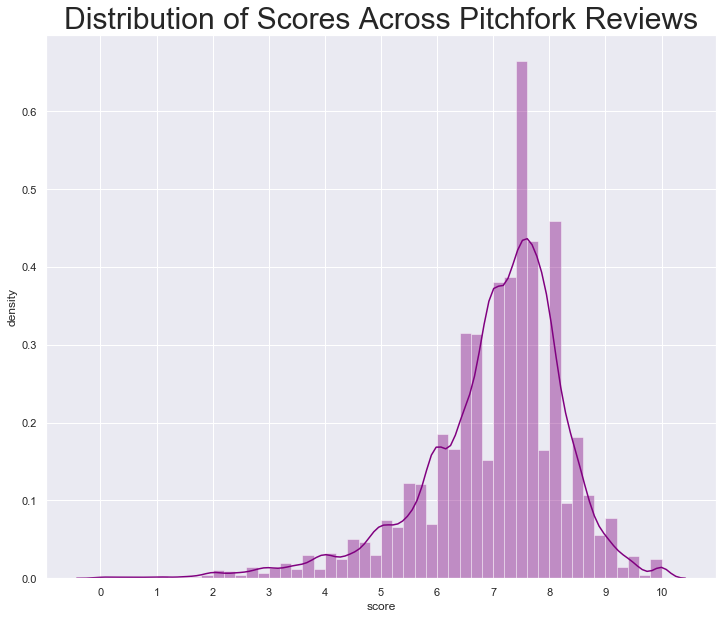

In [5]:
x = p4k['score'].values
genre_count = sns.distplot(x, color = 'purple')
genre_count.set(xlabel = 'score', ylabel = "density")
genre_count.set_xticks(range(11))
genre_count.set_title("Distribution of Scores Across Pitchfork Reviews",
                      fontsize = 30)

### How many reviews are there per genre?

Text(0.5, 1.0, 'Total Number of Review per Genre')

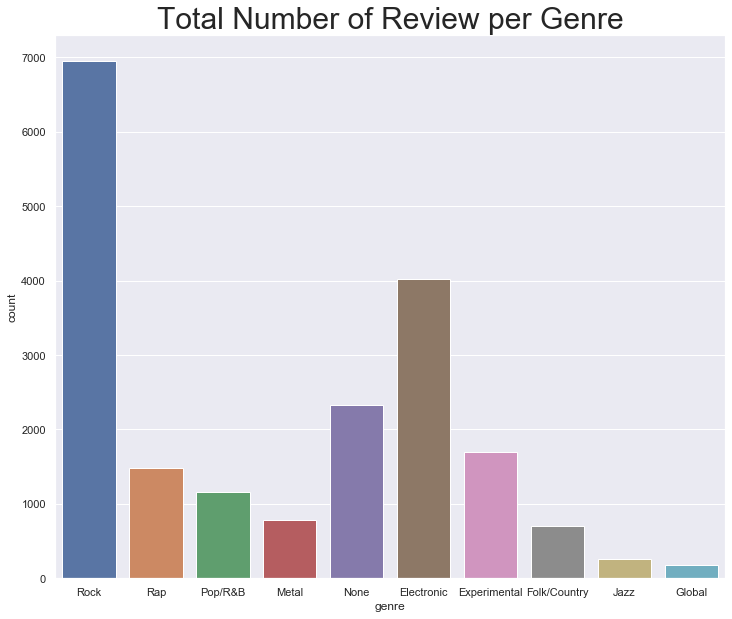

In [6]:
genre_count = sns.countplot(x = 'genre', data = p4k)
genre_count.set_title("Total Number of Review per Genre", fontsize = 30)

### What are average scores per genre?

Text(0.5, 1.0, 'Average Score per Genre')

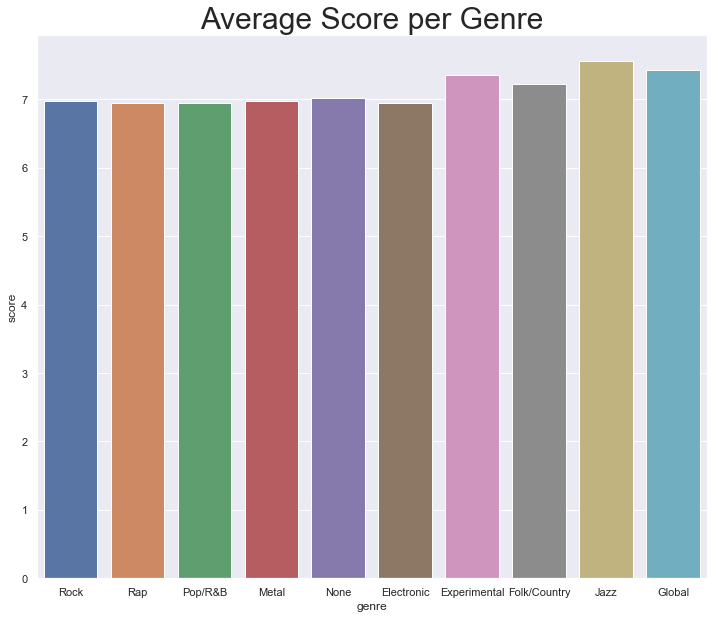

In [7]:
sns.barplot(x = "genre", y = 'score', ci = None,
           data = p4k).set_title("Average Score per Genre",
                                   fontsize = 30)

* The Rock, Rap, Pop/R&B, Metal, Electronic, and None genres have very similar mean scores with electronic having the overall lowest score. 
* Experiemental, Folk/Country, Jazz and Global genres have the highest mean scores with Jazz being the highest. 
    * Jazz music having such a high average score may be due in part to the relatively higher barrier of entry to the genre in terms of instrumental prowess and classical schooling/training. 

### I want to compare how scores changed throughout the years, sorted by genre

Plot Showing Reviews Overtime Color Coded by Genre

In [8]:
#sns.set_theme(style="darkgrid")
#sns.lineplot(x="date", y="score",
#             hue="genre",
#             data=p4k)

Very chaotic due to the unsorted nature of the date variable. 

In [9]:
# Extracting the year from date column
p4k['year'] = pd.DatetimeIndex(p4k['date']).year
p4k.head(3)

,Unnamed: 0,album,artist,best,date,genre,review,score,year
0,1,A.M./Being There,Wilco,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0,2017
1,2,No Shame,Hopsin,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5,2017
2,3,Material Control,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6,2017


([<matplotlib.axis.XTick at 0x2cabe7e6908>,
 <a list of 19 Text xticklabel objects>)

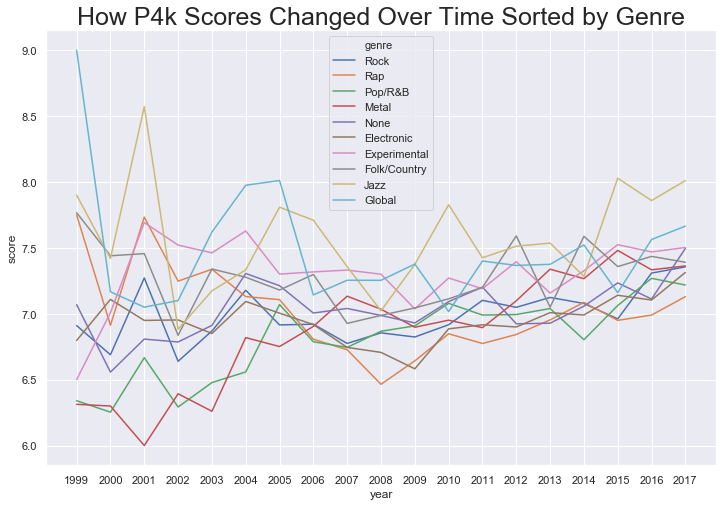

In [10]:
# Changing size for line plots
sns.set(rc = {'figure.figsize':(12,8)})

genre_scores_over_time = sns.lineplot(x="year", y="score",
                                       hue="genre", 
                                       ci = None, markers = True, 
             data=p4k).set_title("How P4k Scores Changed Over Time Sorted by Genre",
                                fontsize = 25)
plt.xticks(range(1999, 2018))

### Looking at individual genres to get a clearer view on trends

In [11]:
rock = p4k[p4k['genre'] == "Rock"]
rap = p4k[p4k['genre'] == "Rap"]
metal = p4k[p4k['genre'] == "Metal"]
three_genres = pd.concat([rock, rap, metal])

([<matplotlib.axis.XTick at 0x2cabed38e88>,
 <a list of 19 Text xticklabel objects>)

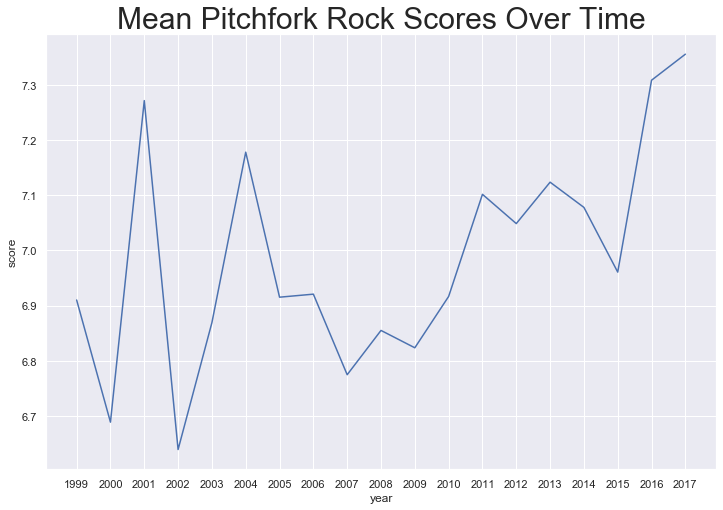

In [12]:
rock_scores_over_years = sns.lineplot(x="year", y="score",
                                       ci = None, markers = True,
             data=rock).set_title("Mean Pitchfork Rock Scores Over Time",
                                fontsize = 30)
plt.xticks(range(1999, 2018))

([<matplotlib.axis.XTick at 0x2cabf0b5e48>,
 <a list of 19 Text xticklabel objects>)

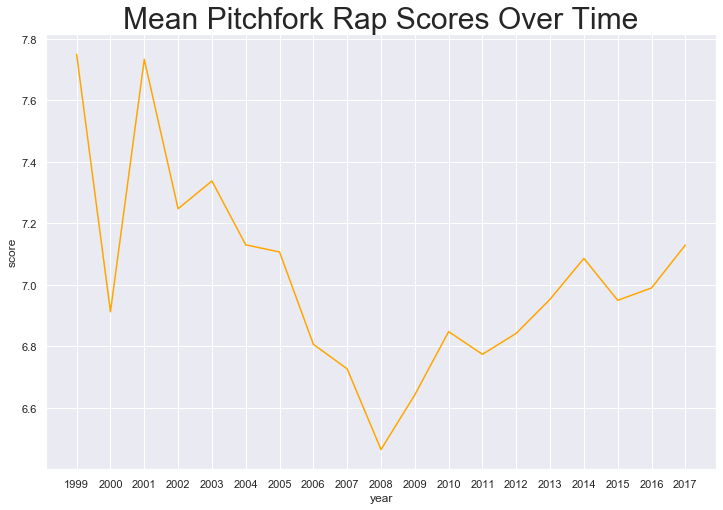

In [13]:
sns.set(rc = {'figure.figsize':(12,8)})
rap_scores_over_years = sns.lineplot(x="year", y="score",
                                       ci = None, markers = True,
                                      color = "orange",
             data=rap).set_title("Mean Pitchfork Rap Scores Over Time",
                                fontsize = 30)
plt.xticks(range(1999, 2018))

([<matplotlib.axis.XTick at 0x2cabef01848>,
 <a list of 19 Text xticklabel objects>)

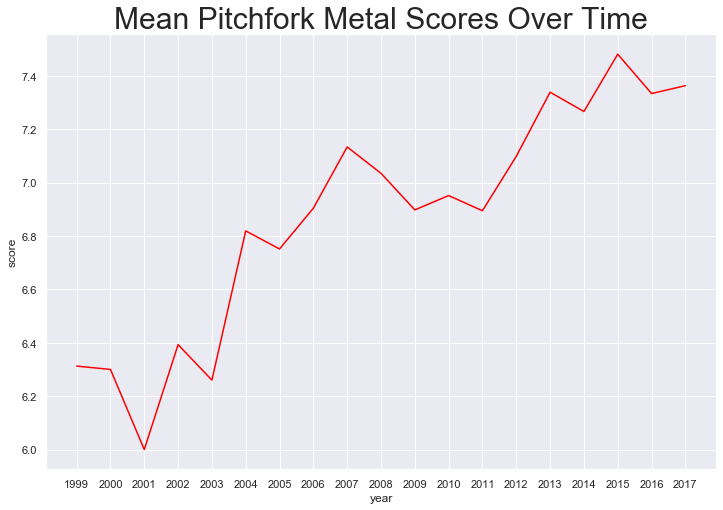

In [14]:
metal_scores_over_years = sns.lineplot(x="year", y="score",
                                       ci = None, markers = True,
                                      color = "red",
             data=metal).set_title("Mean Pitchfork Metal Scores Over Time",
                                  fontsize = 30)
plt.xticks(range(1999, 2018))

([<matplotlib.axis.XTick at 0x2cabeb75348>,
 <a list of 19 Text xticklabel objects>)

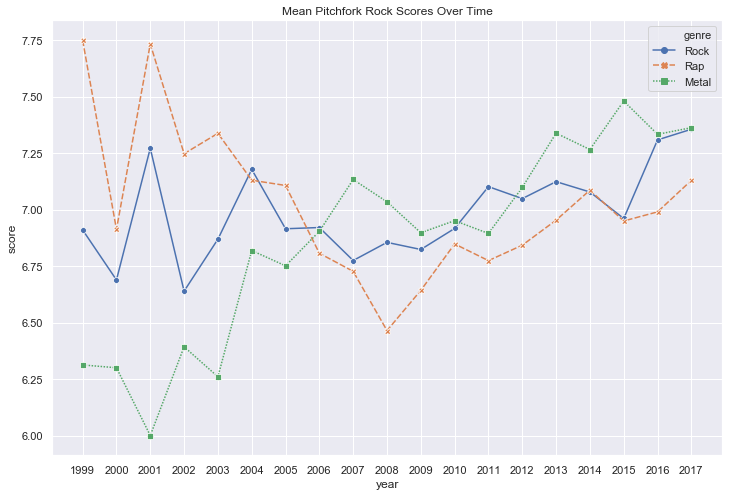

In [15]:
rock_scores_over_years = sns.lineplot(x="year", y="score",
                                      hue = 'genre', style = 'genre',
                                       ci = None, markers = True,
             data=three_genres).set_title("Mean Pitchfork Rock Scores Over Time")
plt.xticks(range(1999, 2018))

In [16]:
# Looking at individual artists' discography
kanye = p4k[p4k['artist'] == "Kanye West"]
radiohead = p4k[p4k['artist'] == "Radiohead"]
tame_impala = p4k[p4k['artist'] == "Tame Impala"]

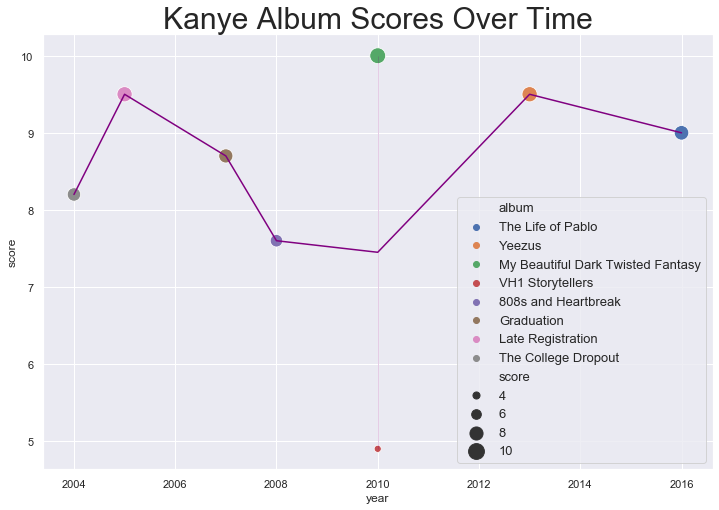

In [17]:
sns.scatterplot(x='year', y="score", size = 'score', sizes = (50,250),
              ci = False, hue = 'album',
             data=kanye).set_title("Kanye Album Scores Over Time",
                                  fontsize = 30)
sns.lineplot(x='year', y="score",
             color = "purple",
             data=kanye)
plt.legend(fontsize = 13, loc = 4)

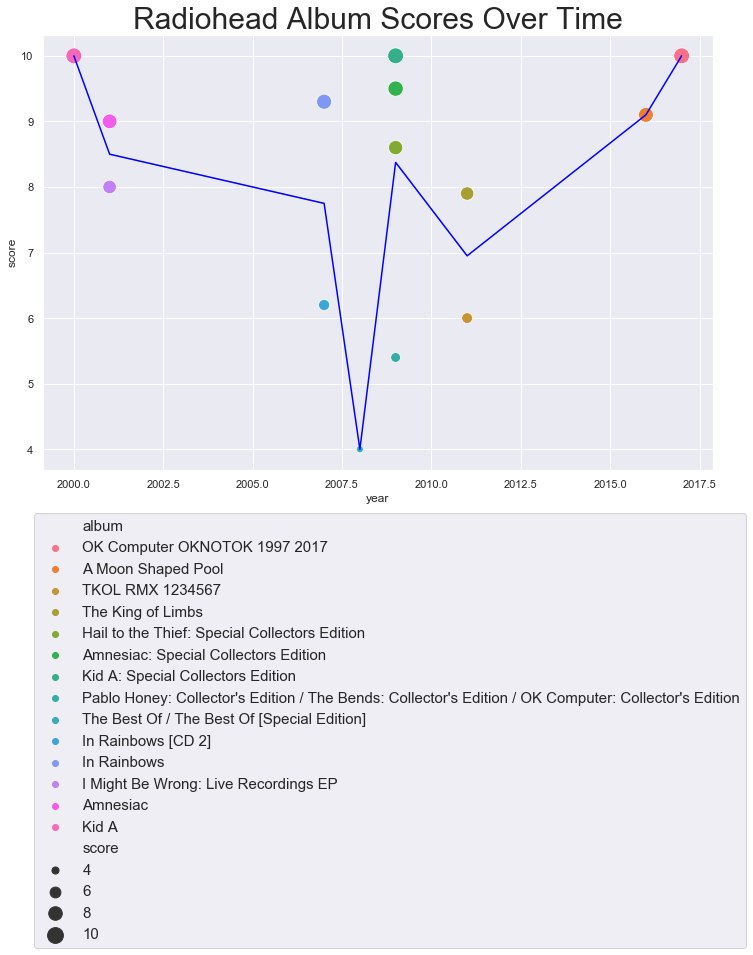

In [18]:
sns.scatterplot(x='year', y="score", size = 'score', sizes = (50,250),
             color = "darkblue", ci = False, hue = 'album',
             data=radiohead).set_title("Radiohead Album Scores Over Time",
                                      fontsize = 30)
sns.lineplot(x='year', y="score",
             color = "blue", ci = False,
             data=radiohead)
plt.legend(bbox_to_anchor=(1.05, -0.6), loc=5, borderaxespad=0, fontsize = 15)

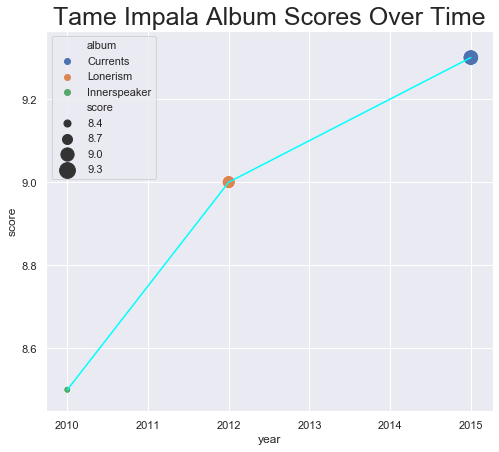

In [21]:
sns.set(rc = {'figure.figsize':(8,7)})

sns.scatterplot(x='year', y="score", size = 'score', sizes = (50,250),
             color = "darkblue", ci = False, hue = 'album',
             data=tame_impala).set_title("Tame Impala Album Scores Over Time",
                                        fontsize = 25)
sns.lineplot(x='year', y="score",
             color = "cyan", ci = False,
             data=tame_impala)